
# KMeans Clustering

In [135]:
from warnings import filterwarnings

from sklearn.impute import SimpleImputer

filterwarnings('ignore')

In [136]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [137]:
import pandas as pd
df = pd.read_csv('../Datasets/Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [138]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
df.columns= ['Id','Gender','Age','Income','Spend']
df.head()

,Id,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [140]:
X = df[['Income','Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


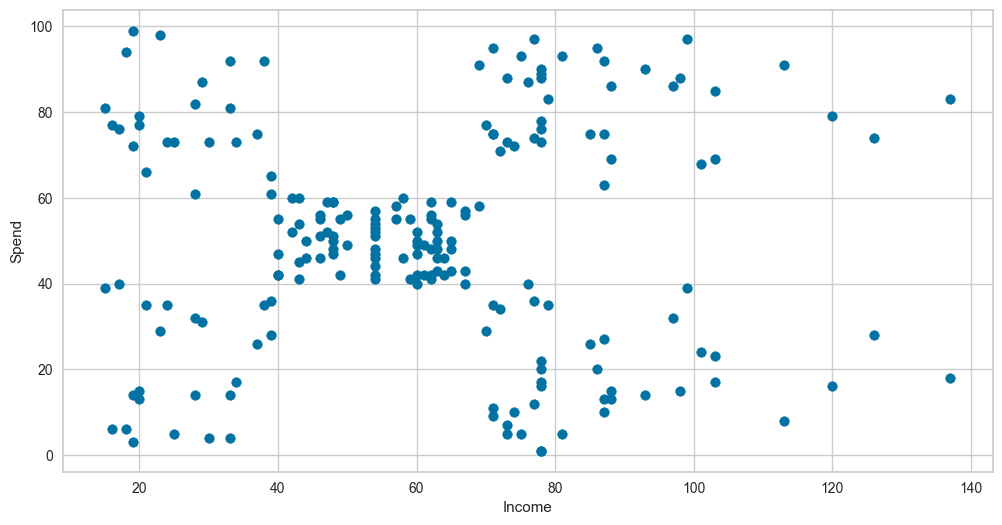

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.scatter(X['Income'],X['Spend'])
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

## Preprocess X data

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([('imputer', SimpleImputer()),
                     ('scaler', StandardScaler())]).set_output(transform='pandas')
X_pre = num_pipe.fit_transform(X)
X_pre.head()


,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Create k clusters using ellbow method

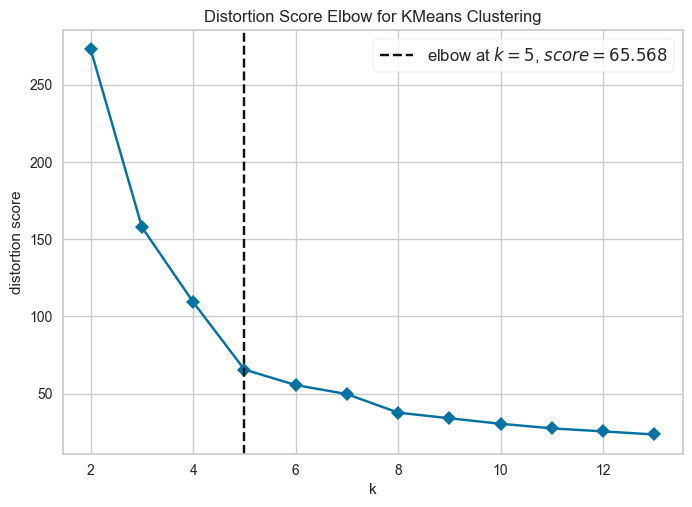

,estimator,KMeans(n_clusters=13)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,False
,locate_elbow,True
,n_clusters,13
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [143]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
model = KMeans()
kelbow_visualizer(model, X_pre, k=(2,14), timings=False )

In [144]:
model = KMeans(n_clusters=5)
model.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [145]:
Labels = model.predict(X)
Labels

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [146]:
X['Labels'] = Labels
X.head()

,Income,Spend,Labels
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3


In [147]:
X[X['Labels']==0]

,Income,Spend,Labels
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [148]:
X[X['Labels']==1]

,Income,Spend,Labels
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [149]:
X[X['Labels']==2]

,Income,Spend,Labels
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2


<Axes: xlabel='Income', ylabel='Spend'>

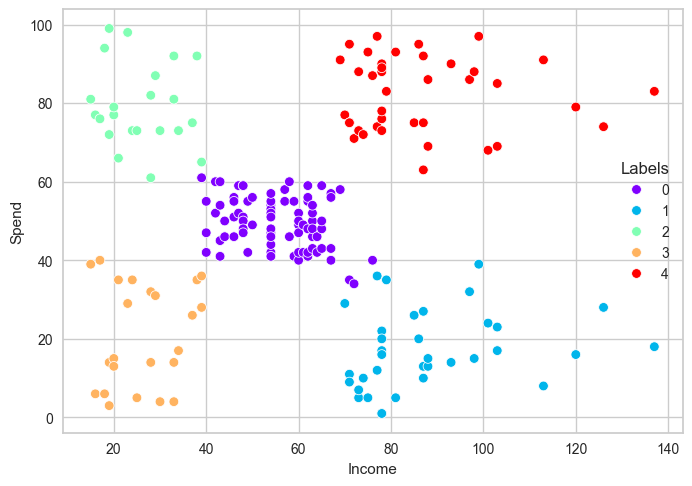

In [150]:
import seaborn as sns
sns.scatterplot(x='Income', y='Spend', hue='Labels', data=X, palette='rainbow')

## consider age also for clustering

In [151]:
X2 = df[['Age','Income','Spend']]
X2.head()

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [152]:
num_pipe2  = Pipeline([('imputer', SimpleImputer()),
                       ('scaler', StandardScaler())]).set_output(transform='pandas')
X_pre2 = num_pipe2.fit_transform(X)
X_pre2.head()

,Income,Spend,Labels
0,-1.738999,-0.434801,0.943690
1,-1.738999,1.195704,0.306062
2,-1.700830,-1.715913,0.943690
3,-1.700830,1.040418,0.306062
4,-1.662660,-0.395980,0.943690


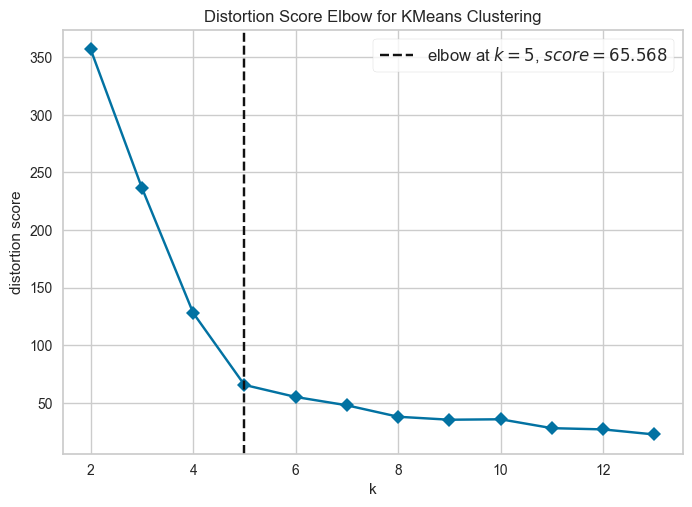

,estimator,KMeans(n_clusters=13)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,False
,locate_elbow,True
,n_clusters,13
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [153]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(), X_pre2, k=(2,14), timings=False)

In [159]:
model2 = KMeans(n_clusters=6)
model2.fit(X)
labels = model2.labels_

In [160]:
X2['labels'] = labels

In [161]:
X2.head()

,Age,Income,Spend,labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [155]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


## Visualize 3d Scatter Plot

In [162]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z= 'Spend', color='labels')
fig.show()